In [ ]:
import pandas as pd


In [ ]:
BikeData = pd.read_csv("SeoulBikeData.csv",sep=",")
BikeData = BikeData.rename(columns={"Rented Bike Count" : "bikeCount","Functioning Day":"functioningDay","Solar Radiation" : "solarRadiation","Dew point temperature":"dpTemperature","Wind speed":"windSpeed"})

In [ ]:
BikeData

,Date,bikeCount,Hour,Temperature,Humidity,windSpeed,Visibility,dpTemperature,solarRadiation,Rainfall,Snowfall,Seasons,Holiday,functioningDay
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)




# Etude des Variables

## Variable : Functional Day

In [ ]:
func_bike = BikeData.groupby("functioningDay").bikeCount.sum()
func_bike
BikeData["functioningDay"] = BikeData["functioningDay"].apply(lambda x : 0 if x=="No" else 1)

## Variable : Holiday

On groupe par jour pour effctuer l'étude sur les jours

In [ ]:
holiday_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
holiday_bike

,Date,bikeCount
0,01/01/2018,4290
1,01/02/2018,5377
2,01/03/2018,5132
3,01/04/2018,17388
4,01/05/2018,26820
...,...,...
360,31/05/2018,31681
361,31/07/2018,22897
362,31/08/2018,27817
363,31/10/2018,21545


Rajout de la variable Holiday

In [ ]:
holiday_bike["Holiday"] = BikeData[BikeData.Hour==12].reset_index().Holiday
holiday_bike

,Date,bikeCount,Holiday
0,01/01/2018,4290,No Holiday
1,01/02/2018,5377,No Holiday
2,01/03/2018,5132,No Holiday
3,01/04/2018,17388,No Holiday
4,01/05/2018,26820,No Holiday
...,...,...,...
360,31/05/2018,31681,No Holiday
361,31/07/2018,22897,No Holiday
362,31/08/2018,27817,No Holiday
363,31/10/2018,21545,No Holiday


Pourcentage de jour de vacances et jour hors vacances

In [ ]:
holiday_bike[holiday_bike.Holiday=="Holiday"].Holiday.count()/holiday_bike.Date.count()

0.049315068493150684

In [ ]:
holiday_bike[holiday_bike.Holiday=="No Holiday"].Holiday.count()/holiday_bike.Date.count()

0.9506849315068493

5% des jours sont des vacances

In [ ]:
holiday_bike.groupby("Holiday").bikeCount.sum()/holiday_bike.bikeCount.sum()

Holiday
Holiday       0.062628
No Holiday    0.937372
Name: bikeCount, dtype: float64

6.2% des vélos sont loués pendants des vacances

Y a t-il plus de jours non Functional Day en vacances ?

In [ ]:
holiday_bike["functioningDay"] = BikeData[BikeData.Hour==12].reset_index().functioningDay
holiday_bike

,Date,bikeCount,Holiday,functioningDay
0,01/01/2018,4290,No Holiday,1
1,01/02/2018,5377,No Holiday,1
2,01/03/2018,5132,No Holiday,1
3,01/04/2018,17388,No Holiday,1
4,01/05/2018,26820,No Holiday,1
...,...,...,...,...
360,31/05/2018,31681,No Holiday,1
361,31/07/2018,22897,No Holiday,1
362,31/08/2018,27817,No Holiday,1
363,31/10/2018,21545,No Holiday,1


In [ ]:
holiday_bike[(holiday_bike.Holiday=="Holiday") & (holiday_bike.functioningDay=="No")].Date.count()/holiday_bike[(holiday_bike.Holiday=="Holiday")].Date.count()

0.0

In [ ]:
holiday_bike[(holiday_bike.Holiday=="No Holiday") & (holiday_bike.functioningDay=="No")].Date.count()/holiday_bike[(holiday_bike.Holiday=="No Holiday")].Date.count()

0.0

In [ ]:
BikeData["Holiday"] = BikeData["Holiday"].apply(lambda x : 0 if x=="No Holiday" else 1)

Les vacances et les non-vacances contiennent tous deux des jour functional et non functional, garder les variables distinctent est donc pertinent

## Variable : Seasons

On groupe une nouvelle fois par jours pour réaliser l'étude

In [ ]:
seasons_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
seasons_bike

,Date,bikeCount
0,01/01/2018,4290
1,01/02/2018,5377
2,01/03/2018,5132
3,01/04/2018,17388
4,01/05/2018,26820
...,...,...
360,31/05/2018,31681
361,31/07/2018,22897
362,31/08/2018,27817
363,31/10/2018,21545


Rajout de la variable Seasons

In [ ]:
seasons_bike["Seasons"] = BikeData[BikeData.Hour==12].reset_index().Seasons
seasons_bike

,Date,bikeCount,Seasons
0,01/01/2018,4290,Winter
1,01/02/2018,5377,Winter
2,01/03/2018,5132,Winter
3,01/04/2018,17388,Winter
4,01/05/2018,26820,Winter
...,...,...,...
360,31/05/2018,31681,Autumn
361,31/07/2018,22897,Autumn
362,31/08/2018,27817,Autumn
363,31/10/2018,21545,Autumn


Calcul du nombre de locations de vélo total au cours des différentes saisons

In [ ]:
seasons_bike = BikeData.groupby("Seasons").bikeCount.sum()
seasons_bike

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: bikeCount, dtype: int64

Affichage sous forme de graphique en bâton

<BarContainer object of 4 artists>

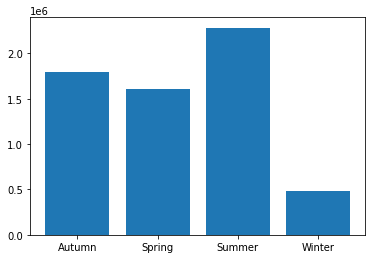

In [ ]:
import matplotlib.pyplot as plt

plt.bar(seasons_bike.index,seasons_bike.values)

Les saisons ont un impact significatif sur la location de vélo. Il est donc pertinent de garder cette variable

In [ ]:
BikeData["Seasons"] = BikeData["Seasons"].apply(lambda x : 0 if x=="Winter" else x)
BikeData["Seasons"] = BikeData["Seasons"].apply(lambda x : 1 if x=="Spring" else x)
BikeData["Seasons"] = BikeData["Seasons"].apply(lambda x : 2 if x=="Summer" else x)
BikeData["Seasons"] = BikeData["Seasons"].apply(lambda x : 3 if x=="Autumn" else x)

## Variable : Snowfall

In [ ]:
snowfall_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
snowfall_bike

,Date,bikeCount
0,01/01/2018,4290
1,01/02/2018,5377
2,01/03/2018,5132
3,01/04/2018,17388
4,01/05/2018,26820
...,...,...
360,31/05/2018,31681
361,31/07/2018,22897
362,31/08/2018,27817
363,31/10/2018,21545


Rajout de la variable Snowfall

In [ ]:
snowfall_bike["Snowfall"] = BikeData[BikeData.Hour==12].reset_index().Snowfall
snowfall_bike

,Date,bikeCount,Snowfall
0,01/01/2018,4290,0.0
1,01/02/2018,5377,0.0
2,01/03/2018,5132,0.0
3,01/04/2018,17388,0.0
4,01/05/2018,26820,0.0
...,...,...,...
360,31/05/2018,31681,0.0
361,31/07/2018,22897,0.0
362,31/08/2018,27817,0.0
363,31/10/2018,21545,0.0


Affichage du nombre de location de vélo en fonction de la quantité de neige

In [ ]:
snowfall_bikes = BikeData.groupby("Snowfall").bikeCount.sum()/snowfall_bike.bikeCount.sum()
snowfall_bikes = snowfall_bikes.reset_index()

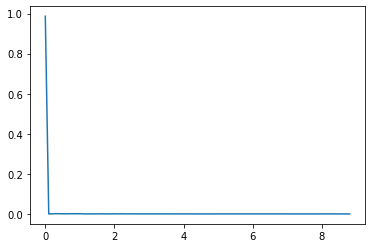

In [ ]:
plt.plot(snowfall_bikes.Snowfall, snowfall_bikes.bikeCount)

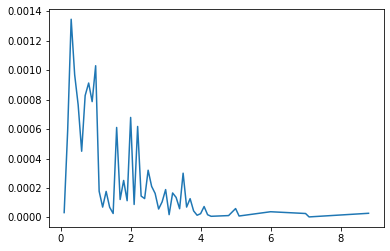

In [ ]:
plt.plot(snowfall_bikes.Snowfall.tolist()[1:], snowfall_bikes.bikeCount.tolist()[1:])

Nous allons en plus créer la variable suivante : True si il y a de la neige et False s'il n'y a pas de neige

In [ ]:
BikeData["Snowy"] = BikeData["Snowfall"].apply(lambda x : 1 if x!=0.0 else 0)

In [ ]:
BikeData.groupby("Snowy").bikeCount.sum()

Snowy
0    6090314
1      82000
Name: bikeCount, dtype: int64

## Variable : Rainfall

In [ ]:
rainfall_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
rainfall_bike = BikeData.groupby("Rainfall").bikeCount.sum()/rainfall_bike.bikeCount.sum()
rainfall_bike = rainfall_bike.reset_index()
rainfall_bike

,Rainfall,bikeCount
0,0.0,0.986017
1,0.1,0.002459
2,0.2,0.000600
3,0.3,0.000227
4,0.4,0.000348
...,...,...
56,21.0,0.000003
57,21.5,0.000097
58,24.0,0.000010
59,29.5,0.000020


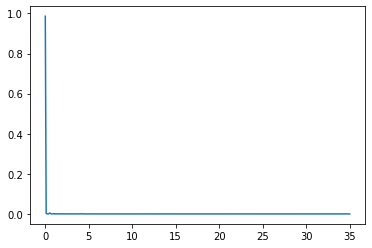

In [ ]:
plt.plot(rainfall_bike.Rainfall, rainfall_bike.bikeCount)

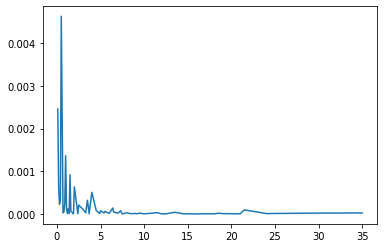

In [ ]:
plt.plot(rainfall_bike.Rainfall.tolist()[1:], rainfall_bike.bikeCount.tolist()[1:])

Nous allons en plus créer la variable suivante : True si il y a de la pluis et False s'il n'y en a pas

In [ ]:
BikeData["Rainy"] = BikeData["Rainfall"].apply(lambda x : 1 if x!=0.0 else 0)
BikeData.groupby("Rainy").bikeCount.sum()

Rainy
0    6086009
1      86305
Name: bikeCount, dtype: int64

## Variable : Solar Radiation

In [ ]:
solar_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
solar_bike = BikeData.groupby("solarRadiation").bikeCount.sum()/solar_bike.bikeCount.sum()
solar_bike = solar_bike.reset_index()
solar_bike

,solarRadiation,bikeCount
0,0.00,0.339318
1,0.01,0.016279
2,0.02,0.010635
3,0.03,0.009434
4,0.04,0.005836
...,...,...
340,3.42,0.000824
341,3.44,0.000197
342,3.45,0.000106
343,3.49,0.000236


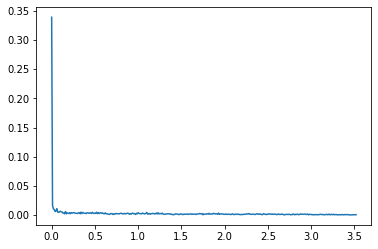

In [ ]:
plt.plot(solar_bike.solarRadiation, solar_bike.bikeCount)

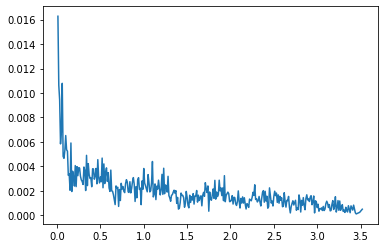

In [ ]:
plt.plot(solar_bike.solarRadiation.tolist()[1:], solar_bike.bikeCount.tolist()[1:])

Nous allons en plus créer la variable suivante : True si il y a du soleil et False s'il n'y en a pas

In [ ]:
BikeData["Sunny"] = BikeData["solarRadiation"].apply(lambda x : 1 if x!=0.0 else 0)
BikeData.groupby("Sunny").bikeCount.sum()

Sunny
0    2094379
1    4077935
Name: bikeCount, dtype: int64

## Variable : Dew point temperature


In [ ]:
dp_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
dp_bike = BikeData.groupby("dpTemperature").bikeCount.sum()/dp_bike.bikeCount.sum()
dp_bike = dp_bike.reset_index()
dp_bike

,dpTemperature,bikeCount
0,-30.6,0.000015
1,-30.5,0.000031
2,-29.8,0.000059
3,-29.7,0.000012
4,-29.6,0.000025
...,...,...
551,26.1,0.000453
552,26.3,0.000076
553,26.6,0.000050
554,26.8,0.000247


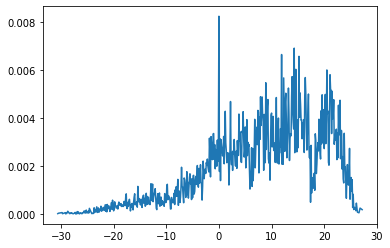

In [ ]:
plt.plot(dp_bike.dpTemperature, dp_bike.bikeCount)

Pas de modifications à apporter sur cette variables

## Variable : Visibility

In [ ]:
vis_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
vis_bike = BikeData.groupby("Visibility").bikeCount.sum()/vis_bike.bikeCount.sum()
vis_bike = vis_bike.reset_index()
vis_bike

,Visibility,bikeCount
0,27,0.000013
1,33,0.000005
2,34,0.000004
3,38,0.000016
4,53,0.000011
...,...,...
1784,1996,0.003167
1785,1997,0.002969
1786,1998,0.003162
1787,1999,0.002992


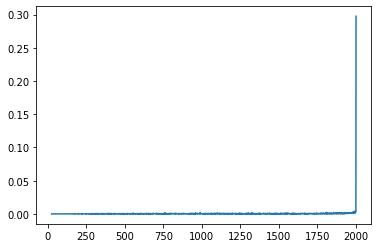

In [ ]:
plt.plot(vis_bike.Visibility, vis_bike.bikeCount)

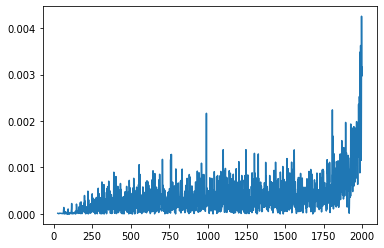

In [ ]:
plt.plot(vis_bike.Visibility.tolist()[:-1], vis_bike.bikeCount.tolist()[:-1])

Nous allons en plus créer la variable suivante : True si la visibilité est maximum et False si non

In [ ]:
BikeData["VisMax"] = BikeData["Visibility"].apply(lambda x : 1 if x!=2000 else 0)
BikeData.groupby("VisMax").bikeCount.sum()

VisMax
0    1836690
1    4335624
Name: bikeCount, dtype: int64

## Variable : Wind Speed

In [ ]:
ws_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
ws_bike = BikeData.groupby("windSpeed").bikeCount.sum()/ws_bike.bikeCount.sum()
ws_bike = ws_bike.reset_index()
ws_bike

,windSpeed,bikeCount
0,0.0,0.005371
1,0.1,0.004692
2,0.2,0.006939
3,0.3,0.011644
4,0.4,0.014185
...,...,...
60,6.7,0.000024
61,6.9,0.000008
62,7.2,0.000292
63,7.3,0.000022


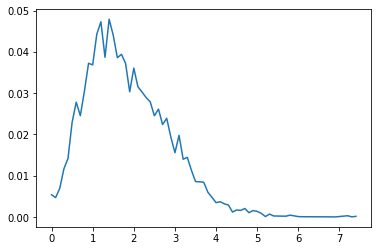

In [ ]:
plt.plot(ws_bike.windSpeed, ws_bike.bikeCount)

Pas de modifications à apporter sur cette variable

## Variable : Humidity

In [ ]:
hu_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
hu_bike = BikeData.groupby("Humidity").bikeCount.sum()/hu_bike.bikeCount.sum()
hu_bike = hu_bike.reset_index()
hu_bike

,Humidity,bikeCount
0,0,0.001123
1,10,0.000213
2,11,0.000322
3,12,0.000329
4,13,0.000705
...,...,...
85,94,0.002215
86,95,0.001968
87,96,0.003072
88,97,0.004655


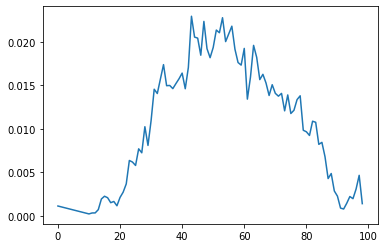

In [ ]:
plt.plot(hu_bike.Humidity, hu_bike.bikeCount)

Pas de modifications à apporter sur cette variable

## Variable : Temperature

In [ ]:
tmp_bike = BikeData[["Date","bikeCount"]].groupby("Date").sum().reset_index()
tmp_bike = BikeData.groupby("Temperature").bikeCount.sum()/tmp_bike.bikeCount.sum()
tmp_bike = tmp_bike.reset_index()
tmp_bike

,Temperature,bikeCount
0,-17.8,0.000052
1,-17.5,0.000047
2,-17.4,0.000010
3,-16.9,0.000006
4,-16.5,0.000016
...,...,...
541,38.0,0.000192
542,38.7,0.000077
543,39.0,0.000167
544,39.3,0.000086


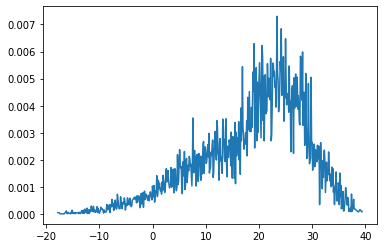

In [ ]:
plt.plot(tmp_bike.Temperature, tmp_bike.bikeCount)

Pas de modifications à apporter sur cette variable



## Variable : Hour

In [ ]:
hr_bike = BikeData[["Hour","bikeCount"]].groupby("Hour").sum().reset_index()
hr_bike["bikeCount"] = hr_bike["bikeCount"] /BikeData.bikeCount.sum()
hr_bike = hr_bike.reset_index()
hr_bike

,index,Hour,bikeCount
0,0,0,0.032019
1,1,1,0.025202
2,2,2,0.017837
3,3,3,0.012024
4,4,4,0.007841
5,5,5,0.008225
6,6,6,0.017005
7,7,7,0.035836
8,8,8,0.060064
9,9,9,0.038200


<BarContainer object of 24 artists>

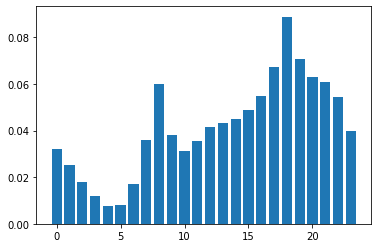

In [ ]:
plt.bar(hr_bike.Hour,hr_bike.bikeCount)

## Variable : Date

From the date we extract the day of the week and the month

In [ ]:
BikeData["Month"] = BikeData["Date"].apply(lambda x : x[3:5])
BikeData.groupby("Month").bikeCount.sum()

Month
01    150006
02    151833
03    380594
04    524227
05    707088
06    896887
07    734460
08    651887
09    673612
10    650675
11    465715
12    185330
Name: bikeCount, dtype: int64

In [ ]:
#BikeData["Day"] = BikeData["Date"].apply(lambda x : pd.to_datetime(x, format="%d/%m/%Y").day_name() )
#BikeData.groupby("Day").bikeCount.sum()

## Conclusion étude des variables

In [ ]:
BikeData

,Date,bikeCount,Hour,Temperature,Humidity,windSpeed,Visibility,dpTemperature,solarRadiation,Rainfall,Snowfall,Seasons,Holiday,functioningDay,Snowy,Rainy,Sunny,VisMax,Month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,0,12
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,0,12
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,0,12
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,0,0,0,0,12
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,1,0,0,0,1,11
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,1,0,0,0,0,11
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,1,0,0,0,1,11
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,1,0,0,0,1,11


# ML

In [ ]:
import numpy as np

columns = BikeData.columns
mask = np.ones(columns.shape, dtype=bool)
mask[0]=0
mask[1]=0

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(BikeData[columns[mask]], BikeData[columns[1]], test_size=0.33)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## Support Vector Machine

In [ ]:

from sklearn import svm
svr = svm.SVR(kernel='linear')

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.2368231559361619 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
# parameters = {  'C'      : [0.5, 1, 1.5]             ,
#                 'gamma'  : [0.5, 0.1, 0.15]      }
# grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
# grid.fit(X_train, y_train)
# print (grid.best_score_, grid.best_estimator_)

In [ ]:
# parameters = {  'C'      : [6, 8, 10]             ,
#                 'gamma'  : [0.01, 0.1, 0.15]      }
# grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
# grid.fit(X_train, y_train)
# print (grid.best_score_, grid.best_estimator_)

In [ ]:
# parameters = {  'C'      : [10, 15, 20]             ,
#                 'gamma'  : [0.01, 0.1, 0.15]      }
# grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
# grid.fit(X_train, y_train)
# print (grid.best_score_, grid.best_estimator_)

In [ ]:
# parameters = {  'C'      : [30, 50, 70]             ,
#                 'gamma'  : [0.01, 0.1, 0.15]      }
# grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
# grid.fit(X_train, y_train)
# print (grid.best_score_, grid.best_estimator_)

In [ ]:
# parameters = {  'C'      : [70, 100, 130]             ,
#                 'gamma'  : [0.1, 0.15,0.2]      }
# grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
# grid.fit(X_train, y_train)
# print (grid.best_score_, grid.best_estimator_)

In [ ]:
# parameters = {  'C'      : [300, 500, 700]             ,
#                 'gamma'  : [0.1, 0.15,0.2]      }
# grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
# grid.fit(X_train, y_train)
# print (grid.best_score_, grid.best_estimator_)

etc

In [ ]:
parameters = {  'C'      : [43500]             ,
                'gamma'  : [0.1]      }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.8446376402395626 SVR(C=43500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## ARDRegression

In [ ]:
from sklearn import linear_model
clf = linear_model.ARDRegression()
clf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,clf.predict(X_test))

168329.87283728195

## RidgeCV

In [ ]:
from sklearn import linear_model
clf = linear_model.RidgeCV()
clf.fit(X_train,y_train)
mean_squared_error(y_test,clf.predict(X_test))

173153.07004413992

# API

In [ ]:

model = svm.SVR(kernel='linear',C=43500,gamma=0.1)
model.fit(X_train, y_train)

from joblib import dump

dump(model, 'api.joblib')

['api.joblib']